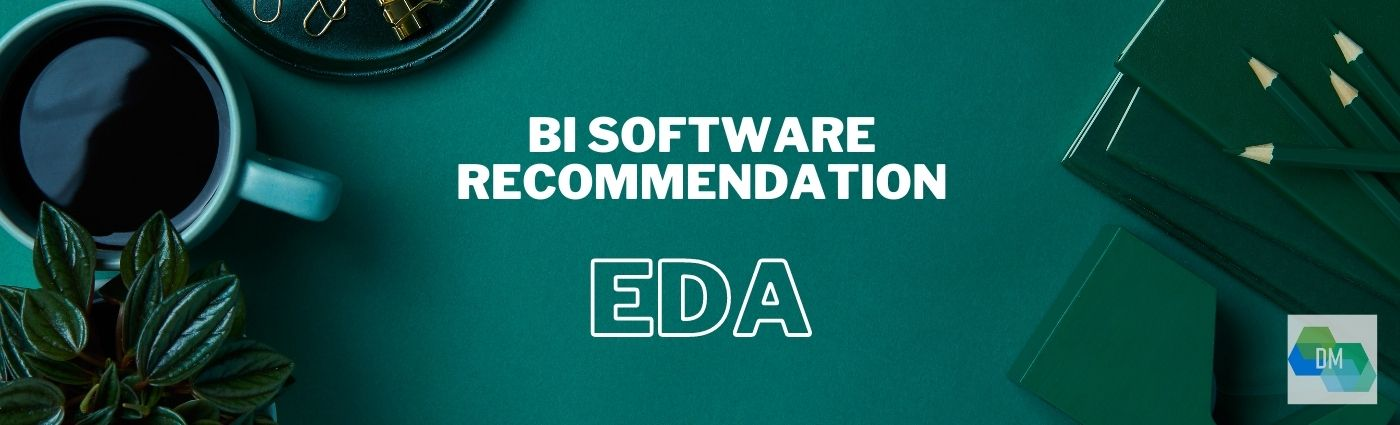

<blockquote>📌This is a synthetic dataset generated in excel (curated from a real BI tools dataset, so you won't find true tool names here but the features represented by those tools are real 🙂) and this dataset would be sufficient to build a simple tool selection/product recommender system.
<br>
This dataset contains 100 rows and 11 features</blockquote>

### <h3 style="background-color:#02645e;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
# getting started with the model 
# importing required libraries/packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### <h3 style="background-color:#02645e;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
# Importing and Reading the Dataset
df_bi= pd.read_csv("../input/bi-software-recommendation-dataset/BI_Software_recommendation_dataset.csv")

In [3]:
df_bi_row_count, df_bi_column_count=df_bi.shape
print('Total number of rows:', df_bi_row_count)
print('Total number of columns:', df_bi_column_count)

Total number of rows: 100
Total number of columns: 11


In [4]:
df_bi.head(5)

,product_id,category,industry,Business_scale,user_type,no_of_users,deployment,OS,mobile_apps,pricing,rating
0,100001,Data Management,Utilities,Large,Business,Single,Cloud,Linux,Y,Freemium,4.5
1,100002,Database/ERP,Food,Large,Business,Single,On-Premise,Mac,Y,Freemium,4.5
2,100003,Data Analysis,Manufacturing,Large,Business,Single,On-Premise,Linux,N,Open Source,5.0
3,100004,Data Analysis,IT,Medium,Business,Mulitple,On-Premise,Mac,Y,Open Source,5.0
4,100005,Benchmarking,Food,Medium,Analyst,Mulitple,Cloud,Windows,N,Enterprise,4.2


In [5]:
df_bi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      100 non-null    int64  
 1   category        100 non-null    object 
 2   industry        100 non-null    object 
 3   Business_scale  100 non-null    object 
 4   user_type       100 non-null    object 
 5   no_of_users     100 non-null    object 
 6   deployment      100 non-null    object 
 7   OS              100 non-null    object 
 8   mobile_apps     100 non-null    object 
 9   pricing         100 non-null    object 
 10  rating          100 non-null    float64
dtypes: float64(1), int64(1), object(9)
memory usage: 8.7+ KB


In [6]:
df_bi.isna().sum()

product_id        0
category          0
industry          0
Business_scale    0
user_type         0
no_of_users       0
deployment        0
OS                0
mobile_apps       0
pricing           0
rating            0
dtype: int64

In [7]:
print ("Unique values are:\n",df_bi.nunique())

Unique values are:
 product_id        100
category           18
industry           11
Business_scale      3
user_type           2
no_of_users         2
deployment          3
OS                  3
mobile_apps         2
pricing             3
rating              6
dtype: int64


### <h3 style="background-color:#02645e;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Data Exploration for the Dataset 🔍 </centre></strong></h3>

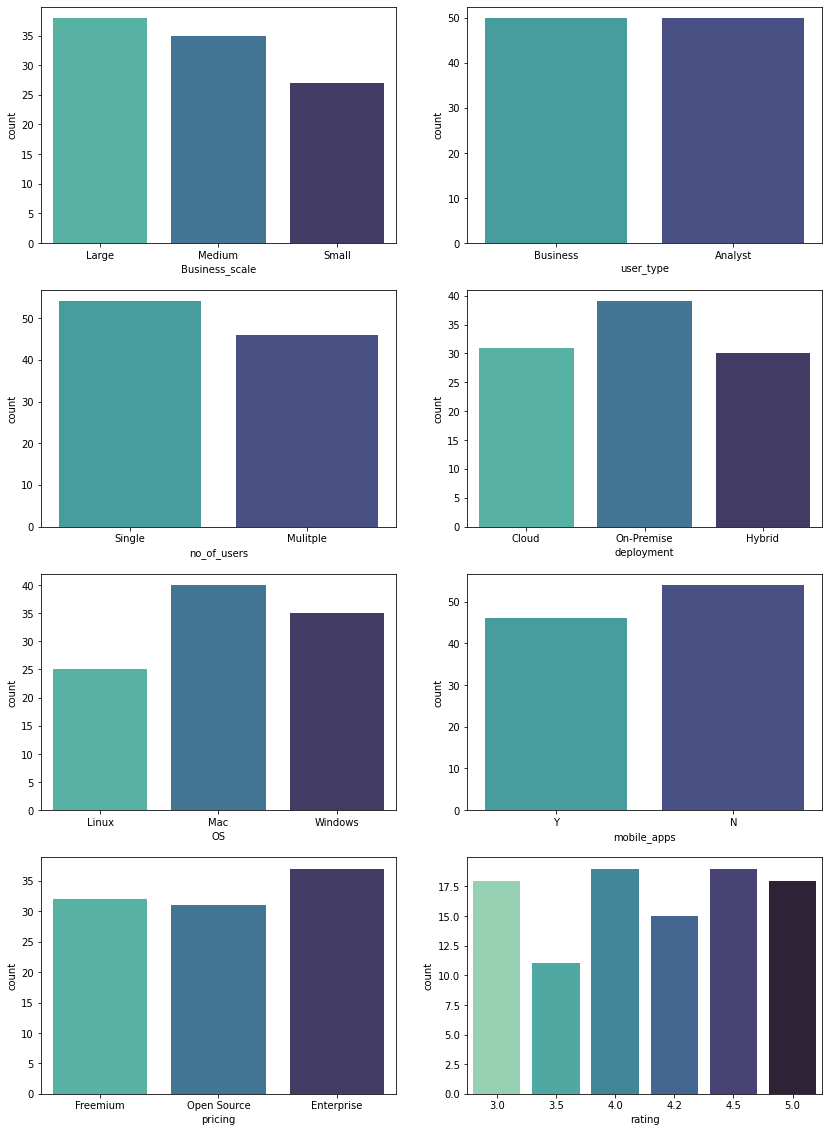

In [8]:
df_rm=['Business_scale','user_type','no_of_users','deployment','OS', 'mobile_apps','pricing', 'rating']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(df_rm):
    sns.countplot(x=col_name, data=df_bi, ax=axs[i], palette='mako_r')

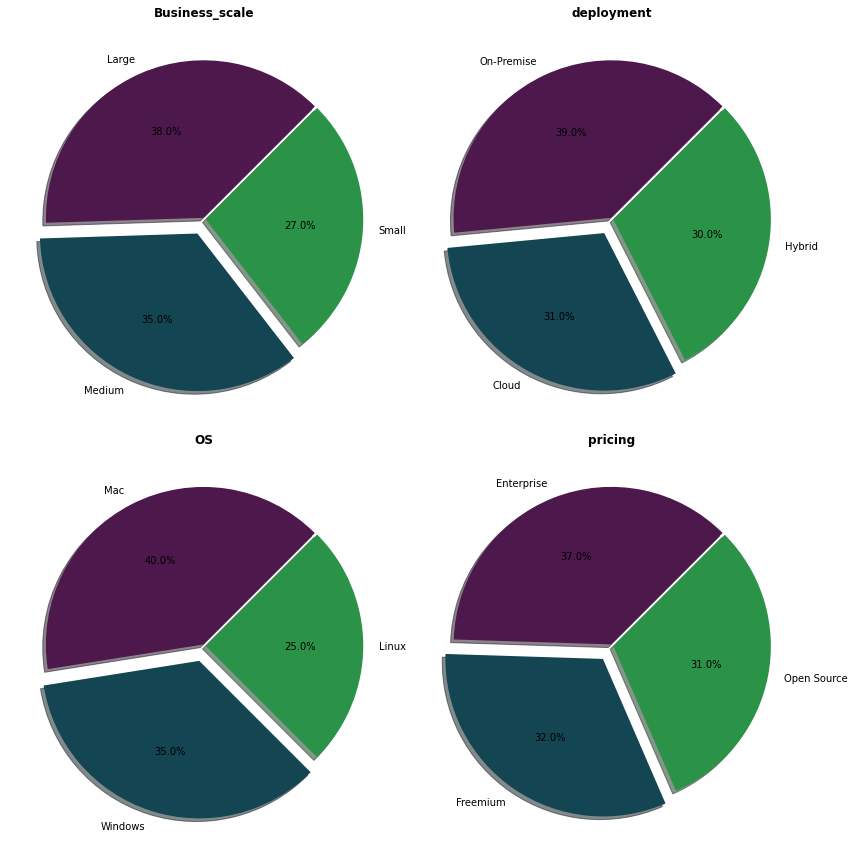

In [9]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = df_bi['Business_scale'].value_counts().index.tolist()[:3]
values = df_bi['Business_scale'].value_counts().tolist()[:3]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#4d194d','#144552','#2b9348'],shadow=True, startangle=45,explode=[0.01, 0.1,0.01])
ax1.set_title("Business_scale", fontdict={'fontsize': 12},fontweight ='bold')

labels = df_bi['deployment'].value_counts().index.tolist()[:3]
values = df_bi['deployment'].value_counts().tolist()[:3]
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#4d194d','#144552','#2b9348'],shadow=True, startangle=45,explode=[0.01, 0.1,0.01])
ax2.set_title("deployment", fontdict={'fontsize': 12},fontweight ='bold')

labels = df_bi['OS'].value_counts().index.tolist()[:3]
values = df_bi['OS'].value_counts().tolist()[:3]
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#4d194d','#144552','#2b9348'],shadow=True, startangle=45,explode=[0.01, 0.1,0.01])
ax3.set_title("OS", fontdict={'fontsize': 12},fontweight ='bold')

labels = df_bi['pricing'].value_counts().index.tolist()[:3]
values = df_bi['pricing'].value_counts().tolist()[:3]
ax4.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#4d194d','#144552','#2b9348'],shadow=True, startangle=45,explode=[0.01, 0.1, 0.01])
ax4.set_title("pricing", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()